In [1]:
# 라이브러리
# 데이터세트
from sklearn.datasets import load_breast_cancer, load_digits, load_wine

#모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Metric
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score, confusion_matrix, classification_report

# 데이터 불러오기

In [2]:
data = load_digits()
X = data.data
y = data.target

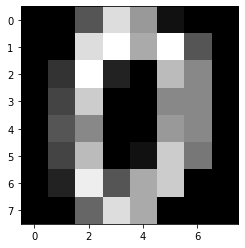

In [3]:
# 이미지 확인
plt.imshow(data.images[0], cmap="gray")

In [4]:
# 데이터 설명
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# model 나누기
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   stratify=y,
                                                   random_state=1234,
                                                   test_size=0.2)

In [6]:
# 모델 학습 및 테스트
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)
# 예측값
y_pred = rf.predict(X_test)

# metric
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')
cf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [7]:
print(f"accuracy : {acc}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")
print(f"confusion_matrix :\n {cf_matrix}")
print(f"classification_report :\n {report}")

accuracy : 0.9833333333333333
precision : 0.9835972850678733
recall : 0.9832496782496782
f1_score : 0.9833173986186432
confusion_matrix :
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  1  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  1  0  0  0 33  1]
 [ 0  0  0  2  0  0  0  0  0 34]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        35
           3       0.95      1.00      0.97        37
           4       0.97      0.97      0.97        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8      

In [8]:
# DeepML풀잎 시간에 다뤄본 K-Fold를 사용해서 학습해보기
# 마침 작은 데이터셋
from sklearn.model_selection import KFold

# 몇개의 Fold를 만들것인가?
kfold = KFold(n_splits=5, random_state=1234, shuffle=True)

In [9]:
acc_list = []
precision_list = []
recall_list = []
model_list = []

for i, (train, valid) in enumerate(kfold.split(X_train)):
    # train, valid 에 들어가는 값은 인덱스 값
    x_trn = X_train[train]
    x_val = X_train[valid]
    
    y_trn = y_train[train]
    y_val = y_train[valid]
    
    # model 불러오기
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_trn, y_trn)
    
    # 예측
    y_pred = rf.predict(x_val)
    
    # metric
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    
    # metric을 저장
    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    # model 저장
    model_list.append(rf)
    print(f"{i+1}-Fold accuracy : {acc}")
    print(f"{i+1}-Fold precision : {precision}")
    print(f"{i+1}-Fold recall : {recall}")
    print()

1-Fold accuracy : 0.96875
1-Fold precision : 0.9650362273592015
1-Fold recall : 0.9669683908045977

2-Fold accuracy : 0.9722222222222222
2-Fold precision : 0.9739802955665026
2-Fold recall : 0.9737025177887247

3-Fold accuracy : 0.9721254355400697
3-Fold precision : 0.9699898249898251
3-Fold recall : 0.972779902814966

4-Fold accuracy : 0.975609756097561
4-Fold precision : 0.9754994452978325
4-Fold recall : 0.9762881794131795

5-Fold accuracy : 0.9442508710801394
5-Fold precision : 0.9485204511800257
5-Fold recall : 0.9466380568356374



In [10]:
# fold별 테스트값 확인
test = model_list[0].predict(X_test)
print(accuracy_score(y_test, test))
print(precision_score(y_test, test, average="macro"))
print(recall_score(y_test, test, average="macro"))

0.9861111111111112
0.9866092466092466
0.9861861861861863


In [11]:
test = model_list[1].predict(X_test)
print(accuracy_score(y_test, test))
print(precision_score(y_test, test, average="macro"))
print(recall_score(y_test, test, average="macro"))

0.975
0.9759923196765301
0.97498712998713


In [12]:
test = model_list[2].predict(X_test)
print(accuracy_score(y_test, test))
print(precision_score(y_test, test, average="macro"))
print(recall_score(y_test, test, average="macro"))

0.975
0.975748374432585
0.9749120549120548


In [13]:
test = model_list[3].predict(X_test)
print(accuracy_score(y_test, test))
print(precision_score(y_test, test, average="macro"))
print(recall_score(y_test, test, average="macro"))

0.9833333333333333
0.9836253923096028
0.9832496782496782


In [14]:
test = model_list[4].predict(X_test)
print(accuracy_score(y_test, test))
print(precision_score(y_test, test, average="macro"))
print(recall_score(y_test, test, average="macro"))

0.9777777777777777
0.978078078078078
0.9777649077649077
